In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pathlib
import os
import sys
import seaborn as sns
import statistics

In [2]:
module_path = 'C:\\Users\\timvr\\Documents\\FAKS\\Doktorski_studij\\Python moduli'
sys.path.insert(-1, module_path)

In [3]:
import my_statistics as ms

### Primer 1: Advertising data set

In [4]:
advertising_df = pd.read_csv('Gradivo'+os.sep+'Advertising.csv')

In [5]:
tv = advertising_df['TV']
radio = advertising_df['radio']
news = advertising_df['newspaper']
sales = advertising_df['sales']
#least sqares data fit
p_dict = {}
for i,j in zip((tv, radio, news), ('tv', 'radio','news')):
    z = np.polyfit(i, sales,1)
    p_dict[j] = np.poly1d(z)

Text(0, 0.5, 'sales')

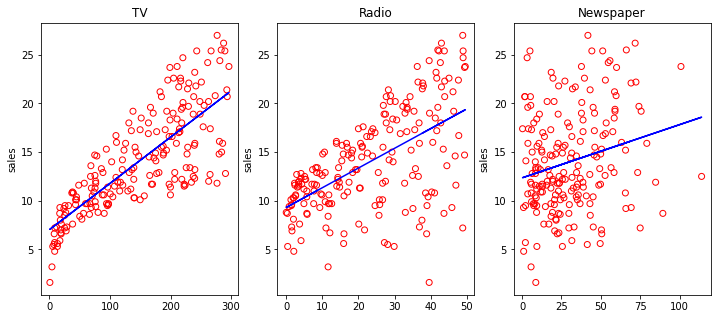

In [6]:
fig, ax = plt.subplots(1,3, figsize=(12,5))
marker_s = dict(marker='o',)
ax[0].scatter(tv, sales, facecolor='none', edgecolors='red')
ax[0].plot(tv, p_dict['tv'](tv), 'blue')
ax[0].set_title('TV')
ax[0].set_ylabel('sales')
ax[1].scatter(radio, sales, facecolor='none', edgecolors='red')
ax[1].plot(radio, p_dict['radio'](radio), 'blue')
ax[1].set_title('Radio')
ax[1].set_ylabel('sales')
ax[2].scatter(news, sales, facecolor='none', edgecolors='red')
ax[2].plot(news, p_dict['news'](news), 'blue')
ax[2].set_title('Newspaper')
ax[2].set_ylabel('sales')

### Primer 2: Income data set

In [7]:
income_df = pd.read_csv('Gradivo'+os.sep+'Income1.csv')

In [8]:
income_df.head()

,Unnamed: 0,Education,Income
0,1,10.000000,26.658839
1,2,10.401338,27.306435
2,3,10.842809,22.132410
3,4,11.244147,21.169841
4,5,11.645485,15.192634


In [9]:
income = income_df['Income']
edu = income_df['Education']

In [10]:
z_inc = np.polyfit(edu, income, 5)
p = np.poly1d(z_inc)

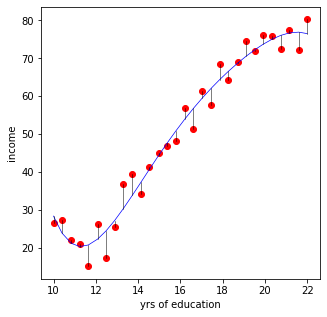

In [11]:
plt.figure(figsize=(5,5))
plt.scatter(edu, income, facecolor='red')
plt.plot(edu, p(edu), c='b', lw=.7)
plt.xlabel('yrs of education')
plt.ylabel('income')
for i in range(len(edu)):
    plt.plot([edu[i]]*2, (income[i], p(edu[i])), c='k', lw=.5)

### Primer 3: Income 2 data set

In [12]:
income2_df = pd.read_csv('Gradivo'+os.sep+'Income2.csv')

In [13]:
income2_df.head()

,Unnamed: 0,Education,Seniority,Income
0,1,21.586207,113.103448,99.917173
1,2,18.275862,119.310345,92.579135
2,3,12.068966,100.689655,34.678727
3,4,17.034483,187.586207,78.702806
4,5,19.931034,20.000000,68.009922


In [14]:
edu2 = income2_df['Education']
sen2 = income2_df['Seniority']
income2 = income2_df['Income']

In [15]:
z_edu = np.polyfit(edu2, income2,3)
p_edu = np.poly1d(z_edu)
z_sen = np.polyfit(sen2, income2,3)
p_sen = np.poly1d(z_sen)

In [16]:
from mpl_toolkits.mplot3d import Axes3D

Text(0.5, 0, 'Income')

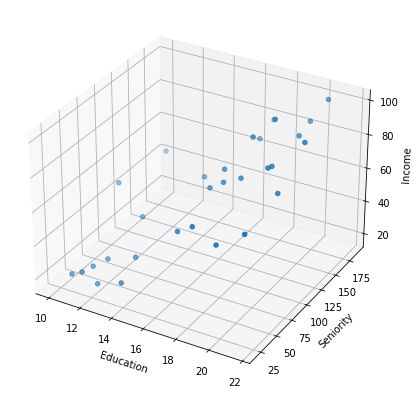

In [17]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(edu2, sen2, income2)
ax.set_xlabel('Education')
ax.set_ylabel('Seniority')
ax.set_zlabel('Income')

In [18]:
# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Plot the surface.
#surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
#                       linewidth=0, antialiased=False)

In [19]:
R.shape

(40, 40)

### MSE (Mean Squared Error)

In [20]:
# za primer 2:
MSE = 0
for i,j in zip(edu, income):
    MSE += (j - p(i))**2 # p - aproksimacija s polinomom 5. stopnje
MSE /= len(income)
print(f'MSE = {MSE:.3f}')

MSE = 12.222


In [21]:
def MSE(y_pred, y_real):
    '''
    Funcition calculates Mean Squared Error (MSE) for inserted data sets.
    :param: y_pred - predicted/aproximated values data set (np.array)
    :param: y_real - true values data set (np.array)
    :return: MSE
    '''
    return (sum((y_pred-y_real)**2))/len(y_pred)

In [22]:
MSE(income, p(edu))

12.221552233793398

#### Izbira ustrezne stopnje polinoma za aproksimacijo podatkov iz primera 2

In [23]:
# delitev podatkov na trening in testne
income = np.array(income_df['Income'])
edu = np.array(income_df['Education'])
train_indices = list(np.arange(0,30,2))
test_indices = list(np.arange(1,30,2))
income_train, income_test = income[train_indices], income[test_indices]
edu_train, edu_test = edu[train_indices], edu [test_indices]

In [24]:
# izračun MSE za različne aproksimacije
MSE_list = []
approximations = np.zeros((len(edu_test), 10))
for i in range(1, 11):
    z = np.polyfit(edu_train, income_train, i)
    p = np.poly1d(z)
    MSE_list.append(MSE(income_test, p(edu_test)))
    approximations[:,i-1] = p(edu_test)

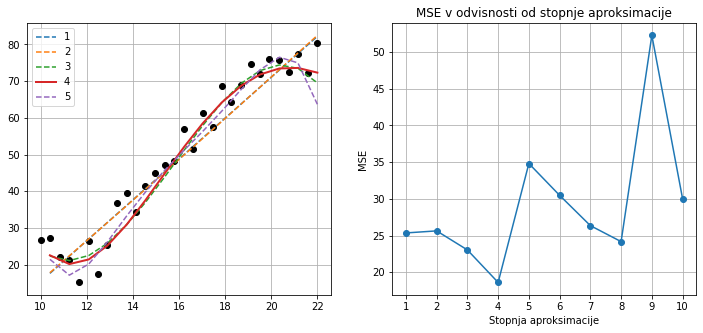

In [25]:
fig, ax = plt.subplots(1,2, figsize=(12,5))
ax[1].plot(np.arange(1,11), MSE_list, ls='-', marker='o')
ax[1].set_xlabel('Stopnja aproksimacije')
ax[1].set_xticks(np.arange(1,11))
ax[1].set_ylabel('MSE')
ax[1].set_title('MSE v odvisnosti od stopnje aproksimacije')
ax[1].grid()
ax[0].plot(edu, income, 'ko')
for i in range(5):
    if MSE_list[i] == min(MSE_list):
        ls, lw, alpha = '-', 2, 1
    else:
        ls, lw, alpha = '--', 1.5, 1
    ax[0].plot(edu_test, approximations[:,i], label=i+1,lw=lw,ls=ls, alpha=alpha)
ax[0].grid()
ax[0].legend()

In [26]:
def mean(X):
    return sum(X)/len(X)

In [27]:
def stdev(X, type_='sample'):
    if type_ == 'popular':
        den = len(X)
    elif type_ == 'sample':
        den = len(X)-1
    return np.sqrt(sum((X-mean(X))**2)/den)

In [28]:
def corr(X, Y):
    num = sum((X-mean(X))*(Y-mean(Y)))/len(X)
    return num/(stdev(X)*stdev(Y))

In [29]:
statistics.variance(edu), statistics.mean(edu), corr(edu, income)

(13.271196148774125, 16.0, 0.9327018105595642)

In [30]:
stdev(edu), statistics.stdev(edu)

(3.642965296125414, 3.642965296125414)

### K Nearest Neighbors (KNN) - naloga 7

In [31]:
def euclidean(P1, P2):
    return np.sqrt(sum(P1**2+P2**2))

In [32]:
def KNN(test_point, input_data, output_data, K):
    """
    Function applies K Nearest Neighbors method.
    :param test_point: test point location (np.array)
    :param input_data: ditionary of input data (key = feature, value=list of freature values)
    :param output_data: output for given input_data (np.array)
    :param K: number of points taken into account by KNN method
    :return: category of test_point.
    """
    #calculate distances
    distances = np.zeros(len(output_data))
    keys = list(input_data.keys())
    for i in range(len(output_data)):
        point_ = np.zeros(len(keys)) # numerično polje posamezne točke
        for j,k in enumerate(keys):
            point_[j] = input_data[k][i]  # dodajanje koordinat točke
        distances[i] = euclidean(test_point, point_)  # računanje razdalje of testne točke
        
    distances_sorted = sorted(distances)
    
    output_data_=output_data.copy()
    
    # dummy variables for output data:
    output_set = list(set(output_data))
    for i, j in enumerate(output_data):
        for k,l in enumerate(output_set):  # k predstavlja indeks elementa v naboru možnih izhodnih podatkov
            if output_data[i] == l: # preverjanje če je posamezni element enak elementu l nabora možnih izhodnih podatkov
                output_data_[i] = k  #  pripis dummy variabla k elementa l i-temu izhodnemu podatku
    
    # indentify K closest points
    closest = output_data_[np.where(distances<=distances_sorted[K-1])[0]]
    count = np.zeros(len(set(output_data)))
    
    for i in closest:
        count[int(i)] += 1 
        
    
    return output_set[np.argmax(count)]

In [33]:
labels=np.arange(1,7)
input_data = {'X1':np.array((0,2,0,0,-1,1)),
              'X2':np.array((3,0,1,1,0,1)),
              'X3':np.array((0,0,3,2,1,1))}
output_data = np.array(('red', 'red', 'red', 'green', 'green', 'red'))
test_point = np.array((0,0,0))

'red'

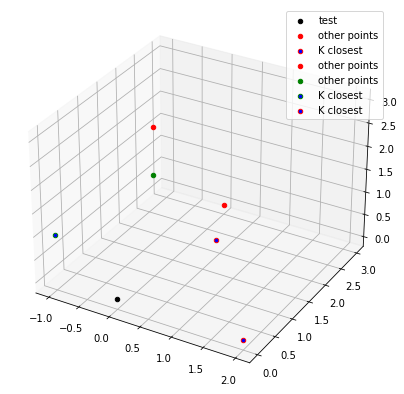

In [34]:
ms.KNN(test_point, input_data, output_data, K=3, show=True)